# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético). Todas las variables son numércias.

### 1. Carga las librerias que consideres comunes al notebook

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [7]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
df = pd.read_csv(url)
df.columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    767 non-null    int64  
 1   plas    767 non-null    int64  
 2   pres    767 non-null    int64  
 3   skin    767 non-null    int64  
 4   test    767 non-null    int64  
 5   mass    767 non-null    float64
 6   pedi    767 non-null    float64
 7   age     767 non-null    int64  
 8   class   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


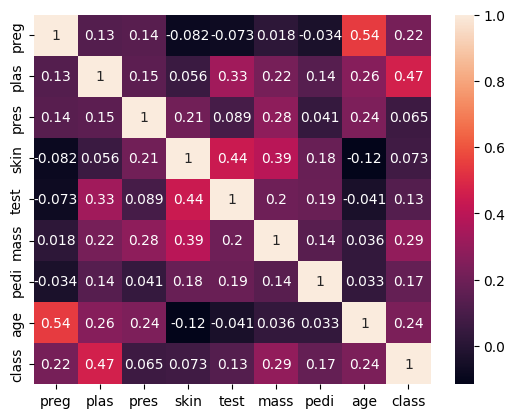

In [11]:
sns.heatmap(df.corr(), annot=True);

### 3. Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [13]:
seed = 7

In [14]:
# feature
X = df.drop("class", axis=1)

# target
y = df["class"]

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

dtc = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=dtc, n_estimators=100, random_state=seed)

kfold = KFold(10)
results_cv = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

In [18]:
results_cv.mean()

0.7731203007518797

### 4. Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=seed, max_features=3)

kfold = KFold(10)
results_cv_rfc = cross_val_score(rfc, X, y, cv=kfold, scoring='accuracy')

In [20]:
results_cv_rfc.mean()

0.7692412850307588

### 5. AdaBoost
Implementa un [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) con 30 árboles.

In [25]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=30, random_state=seed)

kfold = KFold(10)
results_cv_abc = cross_val_score(rfc, X, y, cv=kfold, scoring='accuracy')

In [26]:
results_cv_abc.mean()

0.7692412850307588

### 6. GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, random_state=seed)

kfold = KFold(10)
results_cv_gbc = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

In [22]:
results_cv_gbc.mean()

0.7731203007518797

### 7. XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [23]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster='gbtree' ,n_estimators=100, random_state=seed)

kfold = KFold(10)
results_cv_xgb = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

In [24]:
results_cv_xgb.mean()

0.7731203007518797

### 8. Resultados
Crea un series con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [27]:
result = [results_cv.mean(), results_cv_rfc.mean(), results_cv_abc.mean(), results_cv_gbc.mean(), results_cv_xgb.mean()]
models = ['Bagging DT', "Random Forest", "Ada Boost", "GradientBoosting", "XGBoost"]

resultados = pd.Series(result, models).sort_values(ascending=False)
resultados

Bagging DT          0.773120
GradientBoosting    0.773120
XGBoost             0.773120
Random Forest       0.769241
Ada Boost           0.769241
dtype: float64

# Comprobamos con test

# Separación del df en train y test

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## Bagging DT

In [29]:
dtc = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=dtc, n_estimators=100, random_state=seed)

model.fit(X_train, y_train)

result = model.score(X_test, y_test)
result

0.7662337662337663

## Random Forest

In [31]:
rfc = RandomForestClassifier(n_estimators=100, random_state=seed, max_features=3)

rfc.fit(X_train, y_train)

result_rfc = rfc.score(X_test, y_test)
result_rfc

0.7922077922077922

## Ada Boost

In [36]:
abc = AdaBoostClassifier(n_estimators=30, random_state=seed)

abc.fit(X_train, y_train)

result_abc = abc.score(X_test, y_test)
result_abc

0.7467532467532467

## GradientBoosting

In [37]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=seed)

gbc.fit(X_train, y_train)

result_gbc = gbc.score(X_test, y_test)
result_gbc

0.7402597402597403

## XGBoost

In [38]:
xgb = XGBClassifier(booster='gbtree' ,n_estimators=100, random_state=seed)

xgb.fit(X_train, y_train)

result_xgb = xgb.score(X_test, y_test)
result_xgb

0.7207792207792207

## Resultados

In [39]:
result = [result, result_rfc, result_abc, result_gbc, result_xgb]
models = ['Bagging DT', "Random Forest", "Ada Boost", "GradientBoosting", "XGBoost"]

resultados = pd.Series(result, models).sort_values(ascending=False)
resultados

Random Forest       0.792208
Bagging DT          0.766234
Ada Boost           0.746753
GradientBoosting    0.740260
XGBoost             0.720779
dtype: float64